### Notebook for running SONATA on circle dataset
Below, we replicate our results for circle dataset reported in *SONATA: Disambiguated manifold alignment of single-cell data.*




In [1]:
import os.path as osp
import yaml
from easydict import EasyDict

import sonata
from utils.utils import *
from utils.vis import *
import scotv1

In [2]:
# load parameters and datasets
cfg_url='cfgs/circle.yaml'
with open(cfg_url, 'r',encoding='utf8') as file:
        cfg = EasyDict(yaml.safe_load(file))
basename = osp.basename(osp.dirname(cfg.data_path.dataset_url1))
print("dataset name={}".format(basename))

data1 = load_data(cfg.data_path.dataset_url1)
data2 = load_data(cfg.data_path.dataset_url2)
label1 = load_data(cfg.data_path.label_url1)
label2 = load_data(cfg.data_path.label_url2)
print("data1 shape={}\tdata2 shape={}".format(data1.shape, data2.shape))
print("label1 shape={}\tlabel2 shape={}".format(label1.shape, label2.shape))


dataset name=circle
data1 shape=(300, 1000)	data2 shape=(300, 2000)
label1 shape=(300,)	label2 shape=(300,)


### 1. visualize two modalities

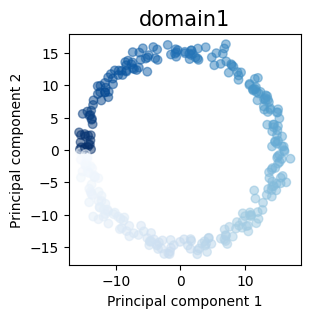

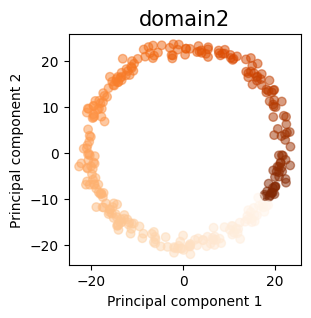

In [3]:
plt_domain_by_const_label(data1, label1, color='Blues', title='domain1', show=True)
plt_domain_by_const_label(data2, label2, color='Oranges', title='domain2', show=True)

### 2. Mapping by SCOT (or any other manifold aligners)

In [4]:
scot = scotv1.SCOT(data1.copy(), data2.copy())
scot.align(k = cfg.scot.k, e=cfg.scot.e, mode=cfg.scot.mode, metric=cfg.scot.metric, normalize=cfg.scot.normalize)
mapping = scot.coupling
x_aligned, y_aligned = projection_barycentric(scot.X, scot.y, mapping, XontoY = cfg.plt.XontoY)

It.  |Err         
-------------------
    0|8.100547e-04|


/Users/zhouhan/Applications/anaconda3/envs/py38/lib/python3.8/site-packages/ot/bregman.py:536: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|1.003162e-04|
   20|6.155272e-05|
   30|3.856653e-05|
   40|2.459515e-05|
   50|1.588617e-05|
   60|1.035077e-05|
   70|6.783686e-06|
   80|4.463246e-06|
   90|2.944150e-06|
  100|1.945427e-06|
  110|1.286958e-06|
  120|8.520046e-07|
  130|5.643348e-07|
  140|3.739176e-07|
  150|2.478053e-07|
  160|1.642512e-07|
  170|1.088801e-07|
  180|7.217995e-08|
  190|4.785231e-08|
It.  |Err         
-------------------
  200|3.172499e-08|
  210|2.103334e-08|
  220|1.394506e-08|
  230|9.245622e-09|
  240|6.129910e-09|
  250|4.064187e-09|
  260|2.694601e-09|
  270|1.786552e-09|
  280|1.184507e-09|
  290|7.853437e-10|


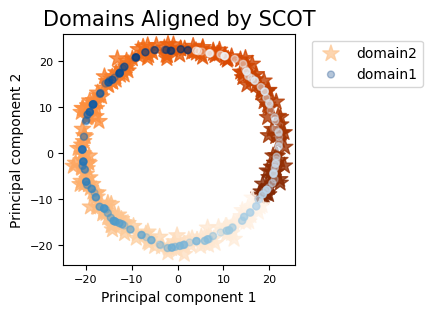

In [5]:
plt_mapping_by_const_label(x_aligned, y_aligned, label1, label2, show=True)

### 3. cell-cell alternaltive mappings from SONATA
For illustration, we allow up to 8 groups instead of an unlimited number.

In [6]:
sn = sonata.sonata(cfg.sonata)
alter_mappings = sn.alt_mapping(data=data1) 

constructing knn graph ...
final k =10
calculating cell-wise ambiguity ...
calculating group-wise ambiguity ...
deciding best k for clustering ...
K = 8 groups choosen by elbow method


#### 3.1 cell-cell ambiguities

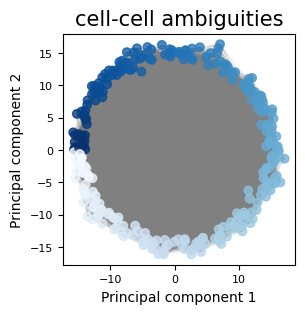

In [7]:
plt_cannotlink_by_const_label(data1, sn.ambiguous_nodes, label1, sn.ambiguous_links, cl_alpha=0.01, show=True)

#### 3.2 Ambiguous groups
We allow up to 8 groups instead of an unlimited number.

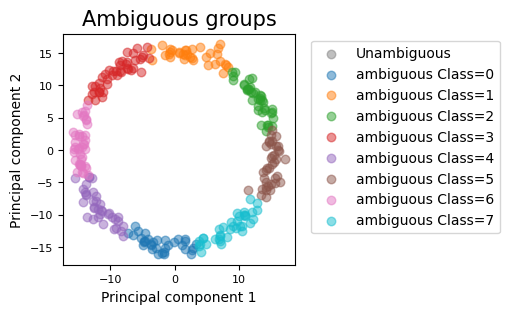

In [8]:
plt_ambiguous_groups_by_const_label(data1, sn.ambiguous_nodes, sn.cluster_labels, show=True)

#### 3.3 k elbow to determine group numbers

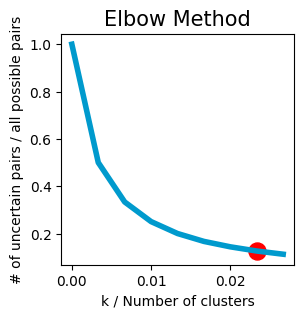

In [9]:
plt_k_elbow(x_step=sn.K_xstep, yerror=sn.K_yerror, best_k=sn.K, show=True)

#### 3.4 Alternative alignments

all vaild perms are:  [(0, 1, 2, 3, 4, 5, 7, 6), (0, 1, 2, 3, 4, 6, 5, 7), (0, 1, 2, 3, 4, 6, 7, 5), (0, 1, 2, 3, 4, 7, 5, 6), (0, 1, 2, 3, 4, 7, 6, 5), (0, 1, 2, 3, 5, 4, 6, 7), (0, 1, 2, 3, 5, 4, 7, 6), (0, 1, 2, 3, 5, 6, 4, 7), (0, 1, 2, 3, 5, 6, 7, 4), (0, 1, 2, 3, 5, 7, 4, 6), (0, 1, 2, 3, 5, 7, 6, 4), (0, 1, 2, 3, 6, 4, 5, 7), (0, 1, 2, 3, 6, 4, 7, 5), (0, 1, 2, 3, 6, 5, 4, 7), (0, 1, 2, 3, 6, 5, 7, 4), (0, 1, 2, 3, 6, 7, 4, 5), (0, 1, 2, 3, 6, 7, 5, 4), (0, 1, 2, 3, 7, 4, 5, 6), (0, 1, 2, 3, 7, 4, 6, 5), (0, 1, 2, 3, 7, 5, 4, 6), (0, 1, 2, 3, 7, 5, 6, 4), (0, 1, 2, 3, 7, 6, 4, 5), (0, 1, 2, 3, 7, 6, 5, 4), (0, 1, 2, 4, 3, 5, 6, 7), (0, 1, 2, 4, 3, 5, 7, 6), (0, 1, 2, 4, 3, 6, 5, 7), (0, 1, 2, 4, 3, 6, 7, 5), (0, 1, 2, 4, 3, 7, 5, 6), (0, 1, 2, 4, 3, 7, 6, 5), (0, 1, 2, 4, 5, 3, 6, 7), (0, 1, 2, 4, 5, 3, 7, 6), (0, 1, 2, 4, 5, 6, 3, 7), (0, 1, 2, 4, 5, 6, 7, 3), (0, 1, 2, 4, 5, 7, 3, 6), (0, 1, 2, 4, 5, 7, 6, 3), (0, 1, 2, 4, 6, 3, 5, 7), (0, 1, 2, 4, 6, 3, 7, 5), (0, 1, 2, 4, 6,

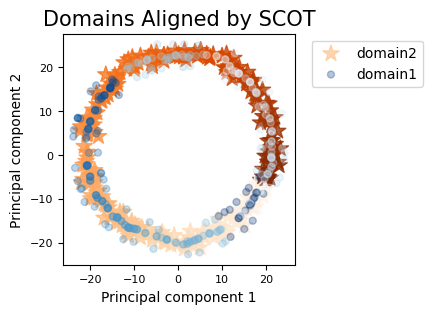

perms:  (0, 1, 2, 3, 4, 6, 5, 7)
changed group id:  5 6
changed group id:  6 5


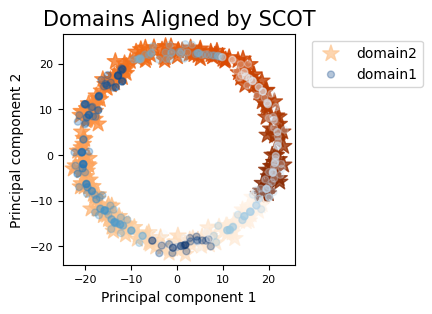

perms:  (0, 1, 2, 3, 4, 6, 7, 5)
changed group id:  5 6
changed group id:  6 7
changed group id:  7 5


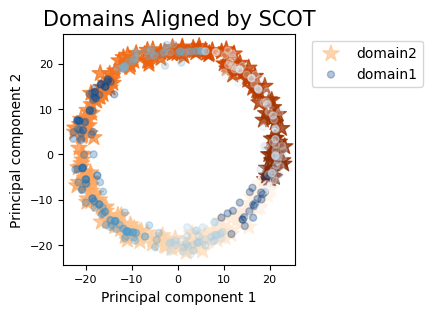

perms:  (0, 1, 2, 3, 4, 7, 5, 6)
changed group id:  5 7
changed group id:  6 5
changed group id:  7 6


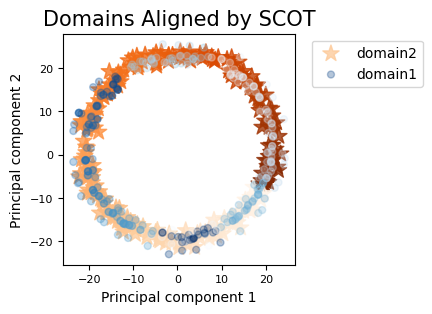

perms:  (0, 1, 2, 3, 4, 7, 6, 5)
changed group id:  5 7
changed group id:  7 5


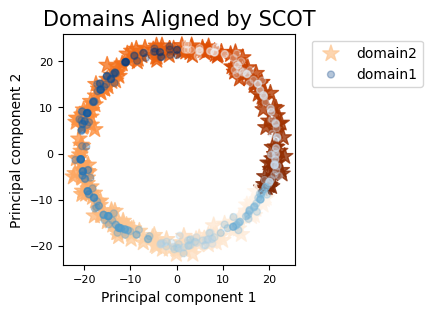

In [10]:
# 15 alternaltives in total, here we show 4 of them
for idx, m in enumerate(alter_mappings, start=1):
    this_mapping = np.matmul(m, mapping)
    x_aligned, y_aligned = projection_barycentric(scot.X, scot.y, this_mapping, XontoY = cfg.plt.XontoY)
    plt_mapping_by_const_label(x_aligned, y_aligned, label1, label2, show=True)
    if idx > 4:
        break